In [50]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [51]:
# Load the Dataset

data = pd.read_csv('/content/Task_File.csv')

In [52]:
# Initial Data Display

print("--- Initial Data Head ---")
print(data.head())
print("\\n--- Data Info ---")
data.info()

--- Initial Data Head ---
  weekend_date   channel brand category sub_category  SerailNum  quantity
0     4/6/2022  Channel1    B1     Cat2     Sub-Cat2          1        56
1    11/6/2022  Channel1    B1     Cat2     Sub-Cat2          1       122
2   18/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       102
3   25/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       128
4     2/7/2022  Channel1    B1     Cat2     Sub-Cat2          1        97
\n--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerailNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)


In [53]:
# Rename Columns

data = data.rename(columns={'SerailNum': 'serial_num', 'weekend_date': 'date'})

In [54]:
# Check for Missing Values

print("\\n--- Missing Values Check ---")
print(data.isna().sum())

\n--- Missing Values Check ---
date            0
channel         0
brand           0
category        0
sub_category    0
serial_num      0
quantity        0
dtype: int64


In [55]:
# Examine Unique Values in Categorical Columns

print("\\n--- Unique Values in Key Columns ---")
for i in ['channel', 'brand', 'category', 'sub_category', 'serial_num']:
  print(f"Column: {i}")
  print(data[i].unique())
  print('----')

\n--- Unique Values in Key Columns ---
Column: channel
['Channel1' 'Channel3' 'Channel2']
----
Column: brand
['B1' 'B2']
----
Column: category
['Cat2' 'Cat3' 'Cat1']
----
Column: sub_category
['Sub-Cat2' 'Sub-Cat4' 'Sub-Cat1' 'Sub-Cat3']
----
Column: serial_num
[1 3 5 2 4]
----


In [56]:
# Display Value Counts for Combinations
print("\\n--- Value Counts of Categorical Combinations ---")
print(data[['channel', 'brand', 'category', 'sub_category', 'serial_num']].value_counts())

\n--- Value Counts of Categorical Combinations ---
channel   brand  category  sub_category  serial_num
Channel1  B1     Cat2      Sub-Cat2      1             118
Channel2  B2     Cat3      Sub-Cat3      2             110
          B1     Cat1      Sub-Cat1      5             109
Channel3  B1     Cat3      Sub-Cat4      3             106
Channel2  B1     Cat3      Sub-Cat4      4              85
          B2     Cat3      Sub-Cat3      4              72
Name: count, dtype: int64


\n--- Visualizing Sales by Key Categories ---


/tmp/ipython-input-2306171392.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='channel', y='quantity', data=data, estimator=sum, ci=None)
/tmp/ipython-input-2306171392.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand', y='quantity', data=data, estimator=sum, ci=None)
/tmp/ipython-input-2306171392.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='quantity', data=data, estimator=sum, ci=None)


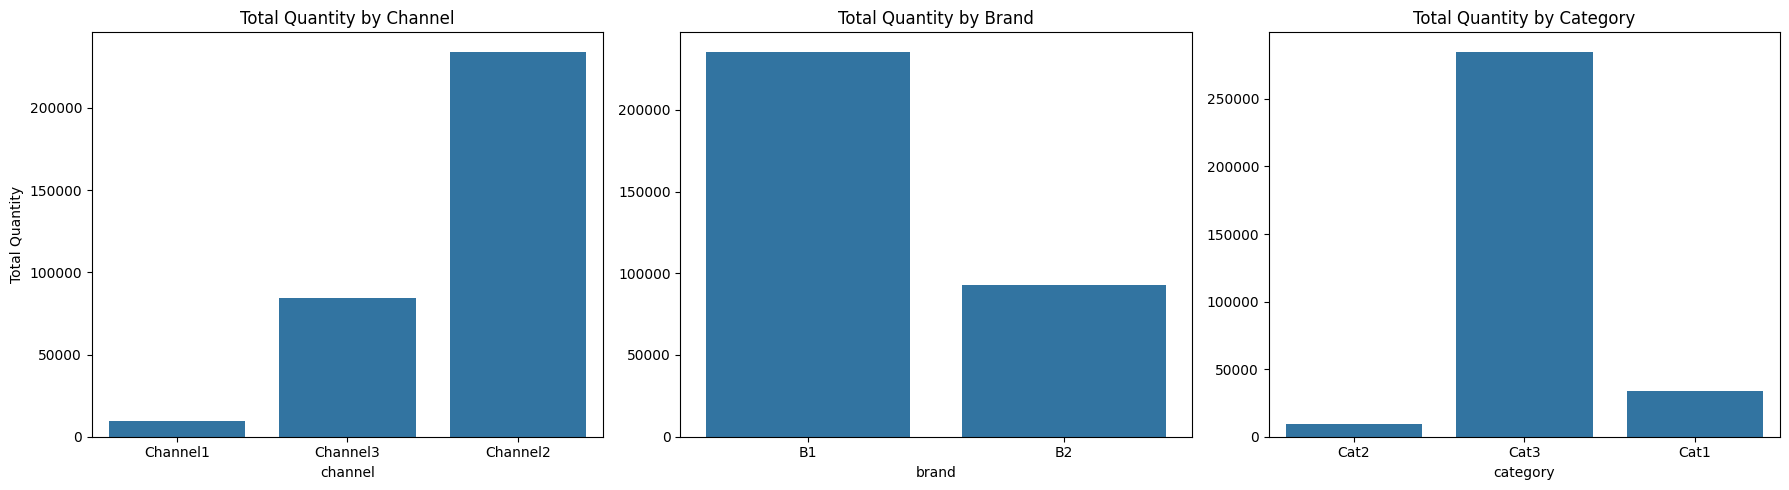

In [57]:
# Analyze Sales by Categorical Features

print("\\n--- Visualizing Sales by Key Categories ---")

# Set the figure size for better readability
plt.figure(figsize=(18, 5))

# Plot total quantity by channel
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st subplot
sns.barplot(x='channel', y='quantity', data=data, estimator=sum, ci=None)
plt.title('Total Quantity by Channel')
plt.ylabel('Total Quantity')

# Plot total quantity by brand
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd subplot
sns.barplot(x='brand', y='quantity', data=data, estimator=sum, ci=None)
plt.title('Total Quantity by Brand')
plt.ylabel('') # Hide y-label for cleaner look

# Plot total quantity by category
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd subplot
sns.barplot(x='category', y='quantity', data=data, estimator=sum, ci=None)
plt.title('Total Quantity by Category')
plt.ylabel('') # Hide y-label for cleaner look

plt.tight_layout()
plt.show()

In [58]:
# Check Data Types

print("\\n--- Data Types Before Date Conversion ---")
print(data.dtypes)

\n--- Data Types Before Date Conversion ---
date            object
channel         object
brand           object
category        object
sub_category    object
serial_num       int64
quantity         int64
dtype: object


In [59]:
# Convert Date Column

data['date'] = pd.to_datetime(data['date'], format='mixed', dayfirst=True)

In [60]:
# Sort and Reset Index

data = data.sort_values(by='date')
data.reset_index(drop=True, inplace=True)

In [61]:
# Aggregate Data into a Weekly Time Series
# Group by date and sum quantities to create the main time series for forecasting.

grouped_data = data.groupby('date')['quantity'].sum().reset_index()

In [62]:
# Display Aggregated Data

print("\\n--- Aggregated Weekly Time Series Data ---")
print(grouped_data.head())

\n--- Aggregated Weekly Time Series Data ---
        date  quantity
0 2022-05-28       203
1 2022-06-04       254
2 2022-06-11       310
3 2022-06-18       321
4 2022-06-25       427


In [63]:
# Verify for Missing Saturdays
# This ensures our weekly time series is continuous.

start_date = grouped_data['date'].min()
end_date = grouped_data['date'].max()

expected_saturdays = pd.date_range(start=start_date, end=end_date, freq='W-SAT')
missing_saturdays = expected_saturdays.difference(grouped_data['date'])

print(f"\\nNumber of missing Saturdays in the time series: {len(missing_saturdays)}")

\nNumber of missing Saturdays in the time series: 0


\n--- Plotting Aggregated Weekly Quantity Over Time ---


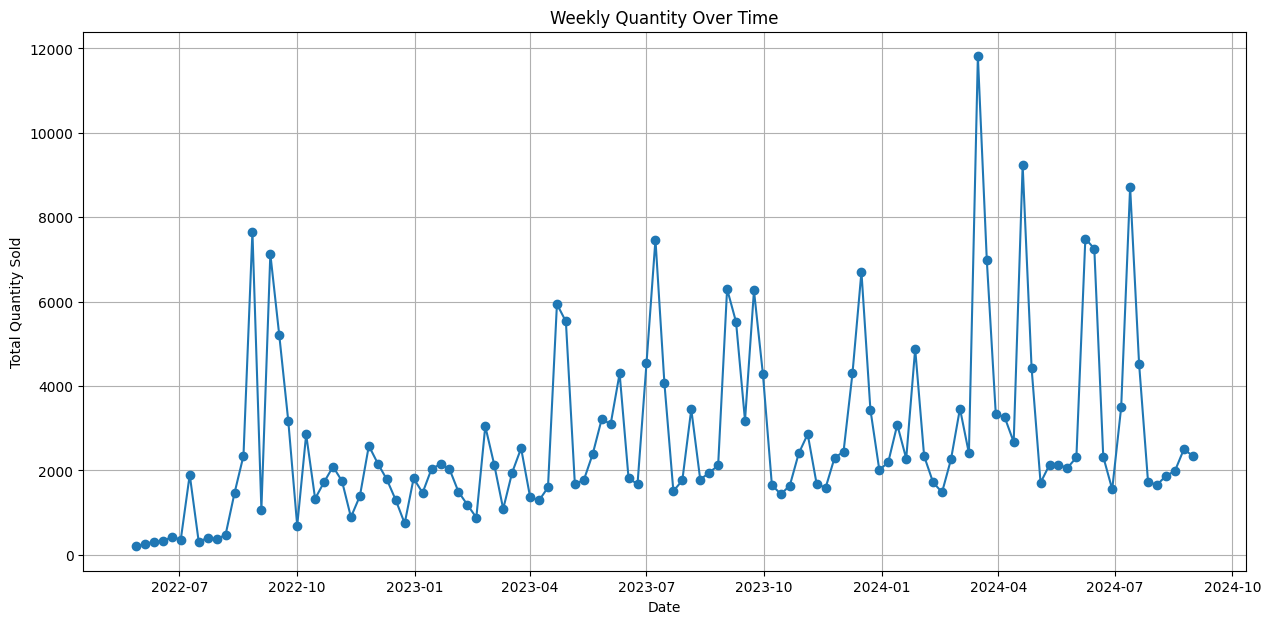

In [64]:
# Plot the Weekly Time Series
print("\\n--- Plotting Aggregated Weekly Quantity Over Time ---")
plt.figure(figsize=(15, 7))
plt.plot(grouped_data['date'], grouped_data['quantity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.title('Weekly Quantity Over Time')
plt.grid(True)
plt.show()

\n--- Time Series Decomposition ---


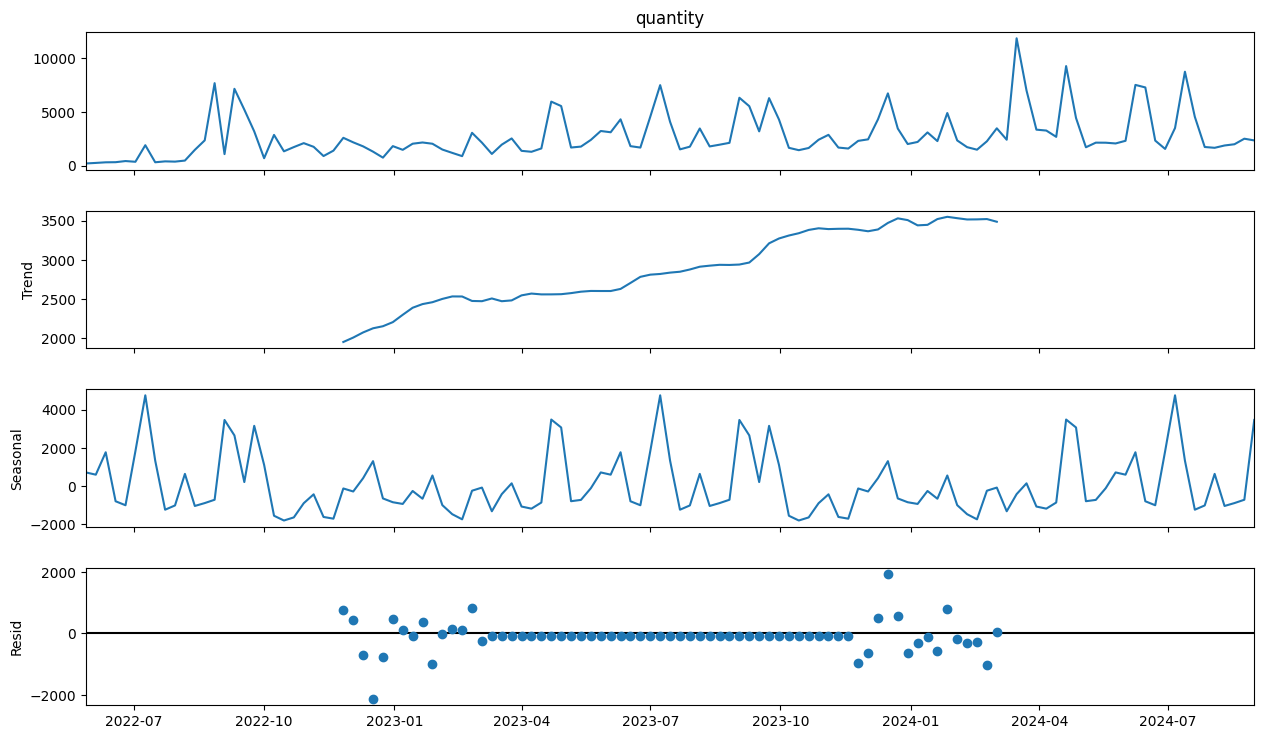

In [65]:
# Decompose the Time Series

print("\\n--- Time Series Decomposition ---")

# Set the date as the index for the decomposition
decom_data = grouped_data.set_index('date')

# Perform seasonal decomposition using a yearly period (52 weeks)
decomposition = seasonal_decompose(decom_data['quantity'], model='additive', period=52)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

\n--- Autocorrelation and Partial Autocorrelation Plots ---


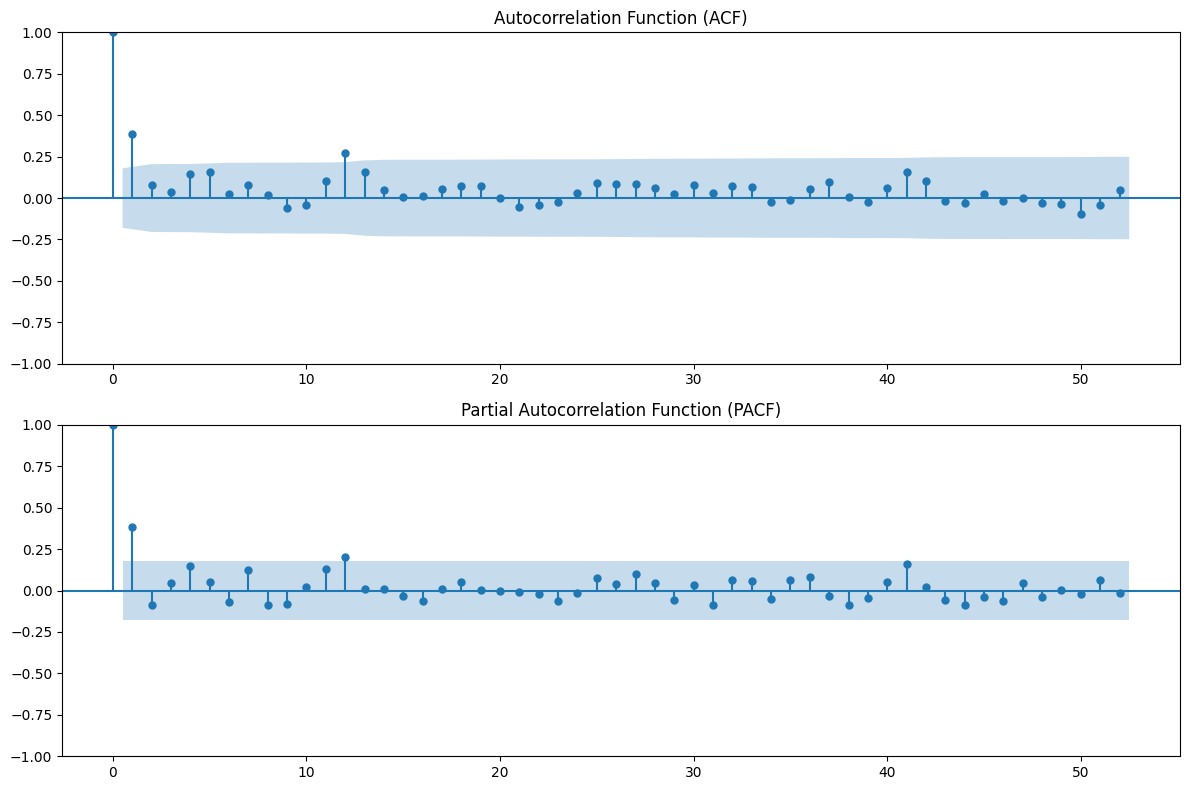

In [66]:
# Plot ACF and PACF

print("\\n--- Autocorrelation and Partial Autocorrelation Plots ---")

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(grouped_data['quantity'], ax=axes[0], lags=52)
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(grouped_data['quantity'], ax=axes[1], lags=52)
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()




In [67]:
# Further Exploration by Month and Year
# Create year and month columns for monthly analysis

grouped_data['year'] = grouped_data['date'].dt.year
grouped_data['month'] = grouped_data['date'].dt.month



In [68]:
# Aggregate Data by Month

gd = grouped_data.groupby(['month', 'year'])['quantity'].sum().reset_index().sort_values(by=['year', 'month'])
gd['date'] = pd.to_datetime(gd[['year', 'month']].assign(day=1))



\n--- Plotting Monthly Quantity by Year ---


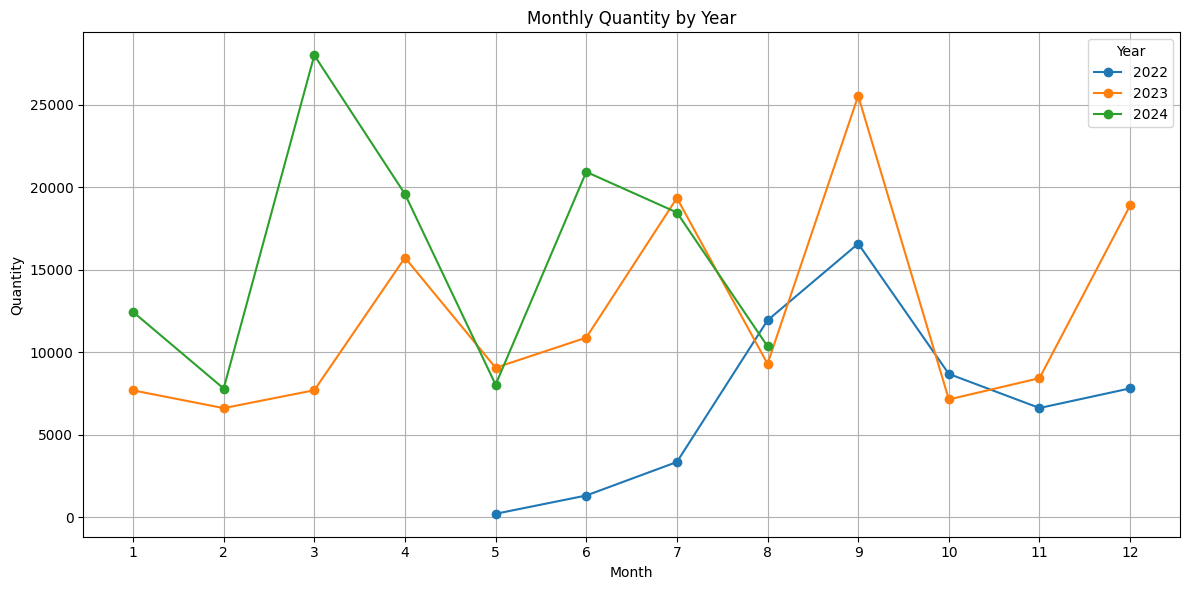

In [69]:
# Plot Monthly Quantity by Year

print("\\n--- Plotting Monthly Quantity by Year ---")
plt.figure(figsize=(12,6))

for year in gd['year'].unique():
    yearly_data = gd[gd['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['quantity'], marker='o', label=str(year))

plt.title('Monthly Quantity by Year')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Year')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Add this to the end of your EDA notebook

grouped_data.to_csv('cleaned_weekly_data.csv', index=False)

print("Cleaned data has been saved to 'cleaned_weekly_data.csv'")

Cleaned data has been saved to 'cleaned_weekly_data.csv'
